In [31]:
import numpy as np
import random as rd
import matplotlib.pyplot as plt
import math
from tqdm import tqdm
import multiprocessing as mp
import coop_game_functions_brown_noise
import colorednoise as cn
import time
import seaborn as sns
%matplotlib inline

In [32]:
def parallelize(game, args):
    tic = time.perf_counter()
    pool = mp.Pool(mp.cpu_count()-4)
    future_res = [pool.apply_async(game, args = args) for _ in range(50000)]
    res = np.array([f.get() for f in future_res])
    mean_capital_list = np.mean(res, axis=0)
    toc = time.perf_counter()
    print(toc-tic)
    return mean_capital_list

In [33]:
x_axis = np.arange(0,2001)

In [34]:
mu_list = [0]
scale_list = np.linspace(0.001, 0.1, 10)

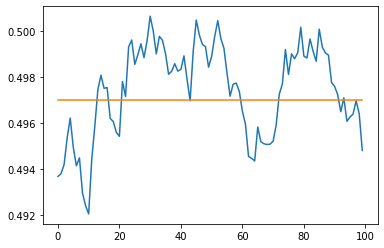

In [25]:
#testing brown noise
scale = 0.003
p_mat = np.full((1,100), 0.5)
noise_mat = cn.powerlaw_psd_gaussian(2, 100)*scale
p_mat_noise = (p_mat - 0.003) + noise_mat

plt.plot(np.array(list(range(0, 100))),p_mat_noise[0] )
plt.plot(np.array(list(range(0, 100))), (p_mat-scale)[0])
plt.show()

# Game A

58.09583069999644
59.63763500000641
58.628800200000114
56.96952350000356
58.02617949999694
58.30661059999693
59.079836000004434
59.11948950000078
60.69082279999566
59.51800419999927


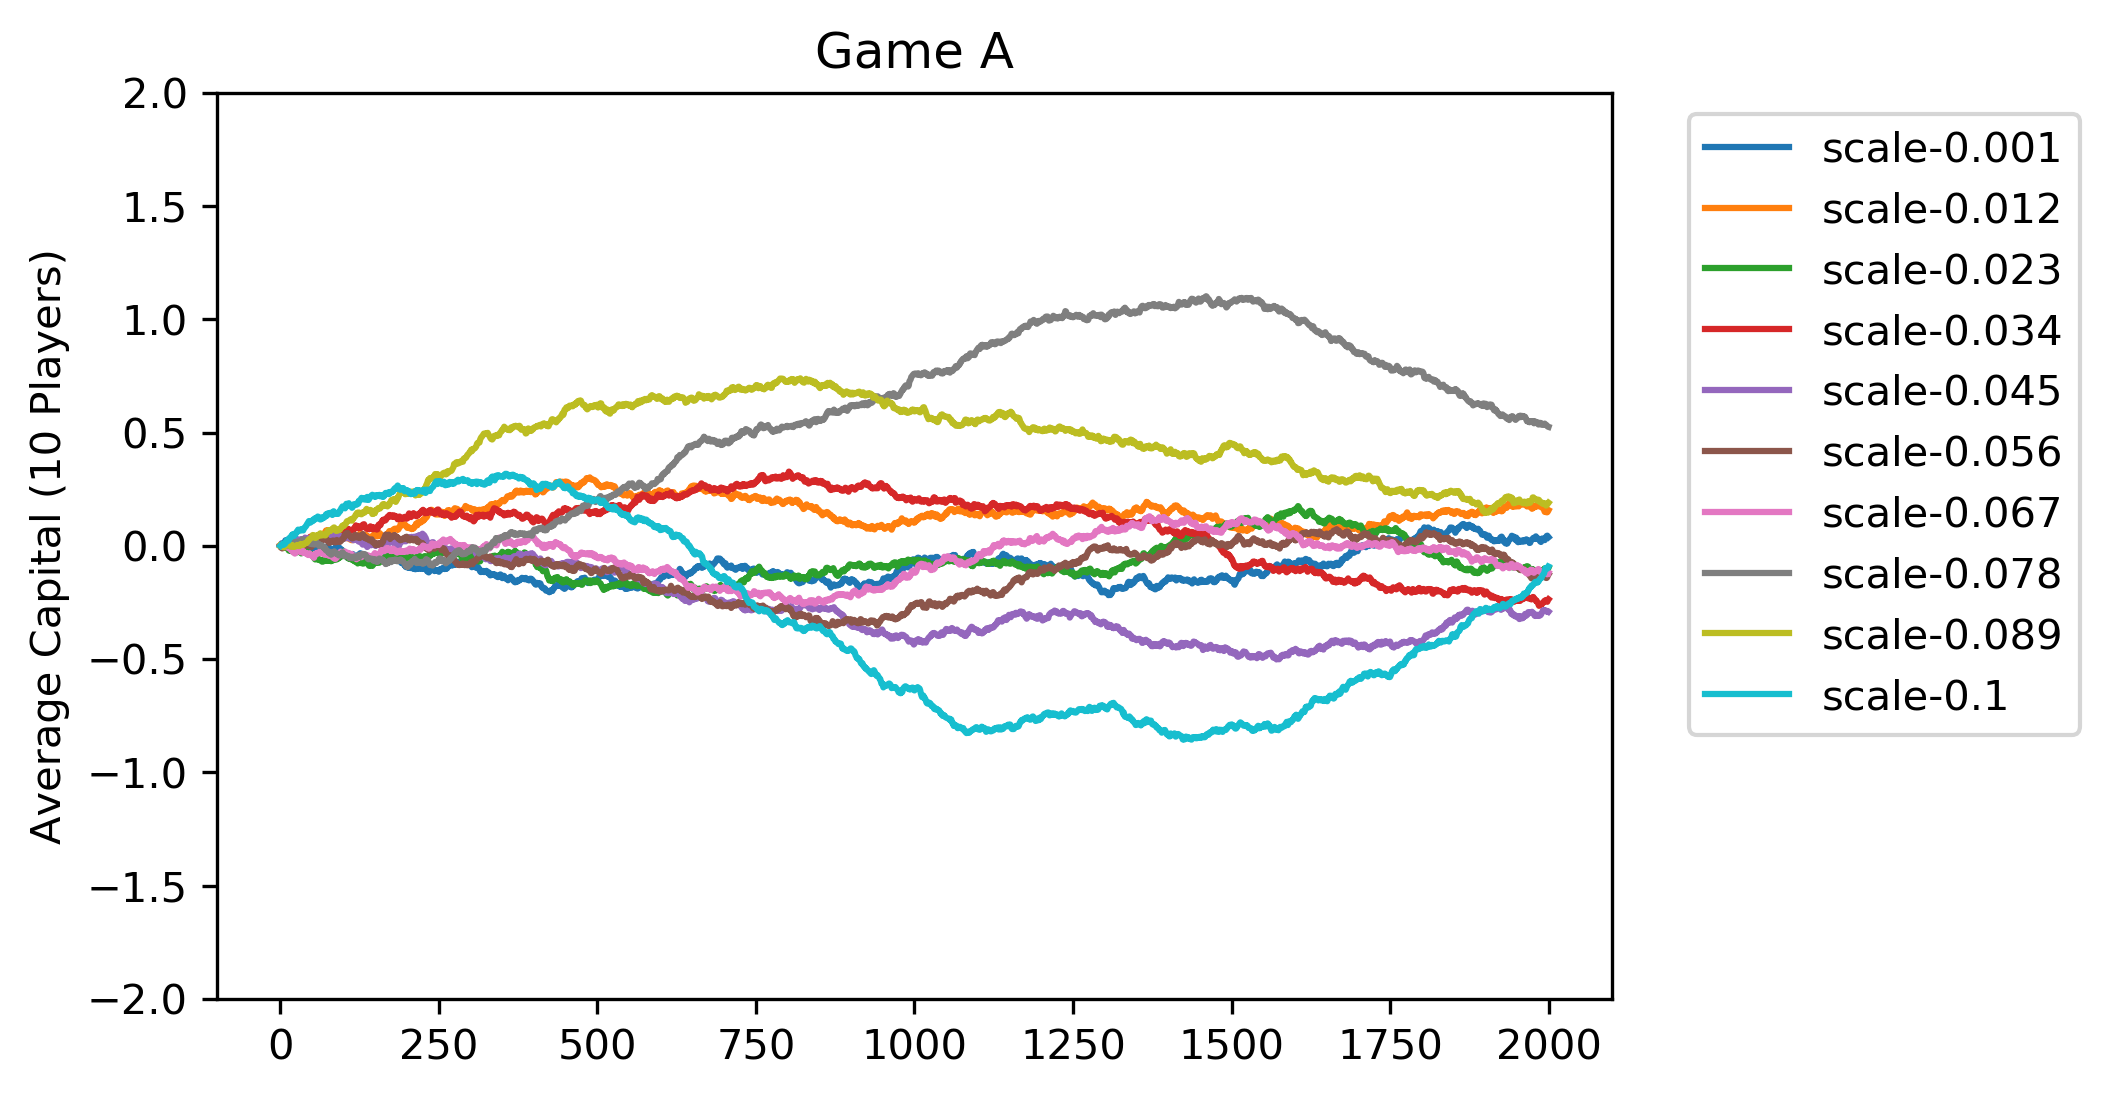

In [35]:
mu = 0
plt.figure(dpi=300)

for scale in scale_list:
    mp.freeze_support()
    tic = time.perf_counter()tele
    
    args = (scale, 0.5, 10, 2000) 
    game_a_results = parallelize(coop_game_functions_brown_noise.sim_game_a_single, args)
    toc = time.perf_counter()
    # with open('./Game_A_npy/game_a_results_noise scale-{}.npy'.format(scale), 'wb') as f:
    #     np.save(f, game_a_results)
    plt.plot(x_axis, game_a_results, label = "scale-{}".format(round(scale, 3)))

plt.ylabel('Average Capital (10 Players)')
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
plt.title('Game A')
plt.ylim(-2, 2)
plt.show()
#plt.savefig('./Game_A_plots/Game A.png')

# Game B

In [ ]:
mu = 0
plt.figure(dpi=300)

for scale in scale_list:
    mp.freeze_support()
    tic = time.perf_counter()
    args = (scale, 1.0, 0.16, 0.7, 10, 2000) 
    game_b_results = parallelize(coop_game_functions_brown_noise.sim_game_b_single, args)
    toc = time.perf_counter()
    with open('./Game_B_npy/game_b_results_noise scale-{}.npy'.format(scale), 'wb') as f:
        np.save(f, game_b_results)
    plt.plot(x_axis, game_b_results, label = "scale-{}".format(round(scale, 3)))
    
plt.ylabel('Average Capital (10 Players)')
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
plt.title('Game B')
plt.savefig('./Game_B_plots/Game B.png')

# Random

In [ ]:
mu = 0
plt.figure(dpi=300)

for scale in scale_list:
    mp.freeze_support()
    tic = time.perf_counter()
    args = (scale, 0.5, 1.0, 0.16, 0.7, 10, 2000) 
    game_rand_results = parallelize(coop_game_functions_brown_noise.sim_rand_a_b_single, args)
    toc = time.perf_counter()
    with open('./Game_rand_npy/game_rand_results_noise scale-{}.npy'.format(scale), 'wb') as f:
        np.save(f, game_rand_results)
    plt.plot(x_axis, game_rand_results, label = "scale-{}".format(round(scale, 3)))

plt.ylabel('Average Capital (10 Players)')
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
plt.title('Game random')
plt.savefig('./Game_rand_plots/Game rand.png')

# AABB

In [ ]:
mu = 0
plt.figure(dpi=300)

for scale in scale_list:
    mp.freeze_support()
    tic = time.perf_counter()
    args = (scale, 0.5, 1.0, 0.16, 0.7, 10, 2000) 
    game_aabb_results = parallelize(coop_game_functions_brown_noise.sim_aabb_single, args)
    toc = time.perf_counter()
    with open('./Game_AABB_npy/game_aabb_results_noise scale-{}.npy'.format(scale), 'wb') as f:
        np.save(f, game_aabb_results)
    plt.plot(x_axis, game_aabb_results, label = "scale-{}".format(round(scale, 3)))

plt.ylabel('Average Capital (10 Players)')
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
plt.title('Game AABB')
plt.savefig('./Game_AABB_plots/Game AABB.png')

# Combined Plot

In [ ]:
#combined plot

#load the numpy arrays
game_a_results = np.load('game_a_results_noise.npy')
game_b_results = np.load('game_b_results_noise.npy')
game_rand_results = np.load('game_rand_results_noise.npy')
game_aabb_results = np.load('game_aabb_results_noise.npy')

#plot
plt.plot(x_axis, game_a_results, label = 'Game A')
plt.plot(x_axis, game_b_results, label = 'Game B')
plt.plot(x_axis, game_aabb_results, label = 'AABB')
plt.plot(x_axis, game_rand_results, label = 'Random')
plt.ylabel('Capital')
plt.ylabel('Games Played')
plt.title("Cooperative Parrondo's Games with Gaussian Noise")
plt.legend()
plt.ylim(-30, 110)
plt.grid()
plt.show()